***
***
***
# Case Study: Diamond Price Evaluation

Course: Python - Data Exploration and Visualization <br>
Date: November 20, 2019
***

In [20]:
# import file

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file = "diamonds_proper_types.xlsx"
diamond = pd.read_excel(file)
diamond

,Obs,carat,color,clarity,cut,channel,store,price
0,2,0.42,6.0,6.0,1.0,2,10,878
1,2,0.35,6.0,2.0,1.0,2,10,893
2,2,0.38,6.0,5.0,1.0,2,10,902
3,2,0.41,6.0,3.0,0.0,2,10,930
4,2,0.40,6.0,5.0,1.0,2,10,949
...,...,...,...,...,...,...,...,...
404,0,1.00,8.0,10.0,0.0,0,8,2999
405,0,0.72,5.0,8.0,1.0,0,8,3499
406,0,0.83,4.0,8.0,0.0,0,8,3995
407,0,0.70,5.0,6.0,0.0,0,8,4990


In [13]:
# check types of variables
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Obs      409 non-null    int64  
 1   carat    400 non-null    float64
 2   color    396 non-null    float64
 3   clarity  402 non-null    float64
 4   cut      399 non-null    float64
 5   channel  409 non-null    int64  
 6   store    409 non-null    int64  
 7   price    409 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.7 KB


In [12]:
# check status of data
diamond.describe().round(2)

,Obs,carat,color,clarity,cut,channel,store,price
count,409.00,400.00,396.00,402.00,399.00,409.00,409.00,409.00
mean,1.67,1.05,4.24,6.06,0.38,1.67,9.13,6488.23
std,0.66,0.42,1.81,1.57,0.49,0.66,2.59,4414.43
min,0.00,0.32,1.00,2.00,0.00,0.00,1.00,878.00
25%,2.00,0.72,3.00,5.00,0.00,2.00,10.00,3490.00
50%,2.00,1.02,4.00,6.00,0.00,2.00,10.00,5550.00
75%,2.00,1.21,6.00,7.00,1.00,2.00,11.00,8089.00
max,2.00,2.48,9.00,10.00,1.00,2.00,11.00,27575.00


In [5]:
# check for missing data
diamond.isnull().any()

Obs        False
carat       True
color       True
clarity     True
cut         True
channel    False
store      False
price      False
dtype: bool

In [8]:
# count nulls in each variable
diamond.isnull().sum()

Obs         0
carat       9
color      13
clarity     7
cut        10
channel     0
store       0
price       0
dtype: int64

In [16]:
# show propotions of the nulls in data
(diamond.isnull().sum()/len(diamond)).round(2)

Obs        0.00
carat      0.02
color      0.03
clarity    0.02
cut        0.02
channel    0.00
store      0.00
price      0.00
dtype: float64

In [18]:
# drop null mathod
diamond_df = diamond.dropna()
diamond_df

,Obs,carat,color,clarity,cut,channel,store,price
0,2,0.42,6.0,6.0,1.0,2,10,878
1,2,0.35,6.0,2.0,1.0,2,10,893
2,2,0.38,6.0,5.0,1.0,2,10,902
3,2,0.41,6.0,3.0,0.0,2,10,930
4,2,0.40,6.0,5.0,1.0,2,10,949
...,...,...,...,...,...,...,...,...
404,0,1.00,8.0,10.0,0.0,0,8,2999
405,0,0.72,5.0,8.0,1.0,0,8,3499
406,0,0.83,4.0,8.0,0.0,0,8,3995
407,0,0.70,5.0,6.0,0.0,0,8,4990


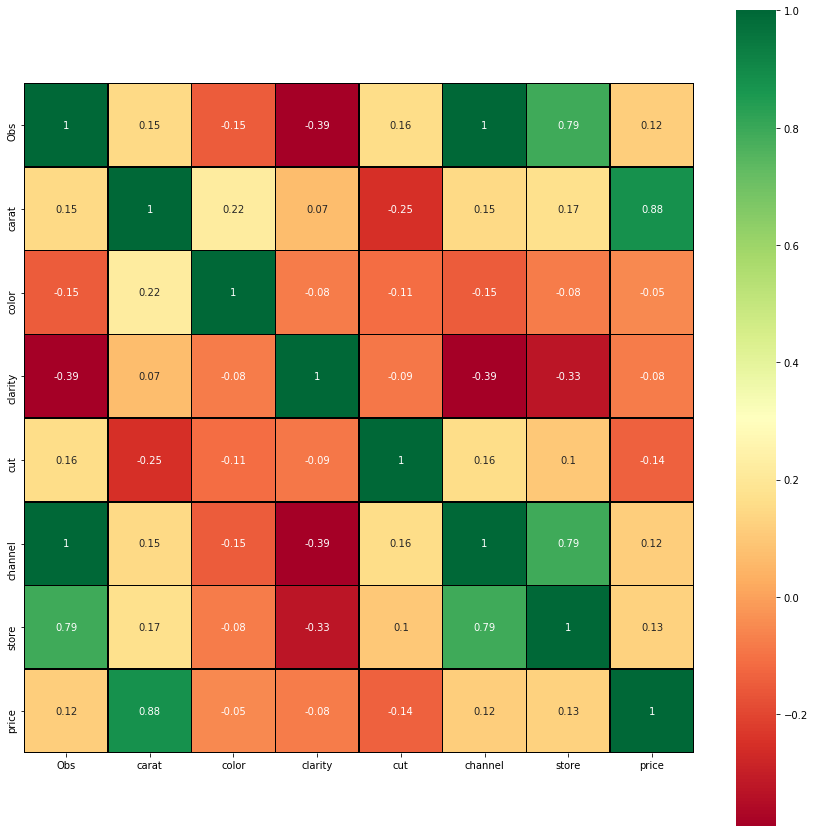

In [22]:
# generating a correlation matrix
df_corr = diamond_df.corr().round(2)

# printing the correlation matrix
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(df_corr,
            cmap="RdYlGn",
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


#plt.savefig('Correlation Heatmap.png')
plt.show()

In [23]:
# focusing on correlations with the target variable and sorting values
df_corr.loc['price'].sort_values(ascending = False)

price      1.00
carat      0.88
store      0.13
channel    0.12
Obs        0.12
color     -0.05
clarity   -0.08
cut       -0.14
Name: price, dtype: float64

Insight: There is high correlation between carat and price of the diamond.

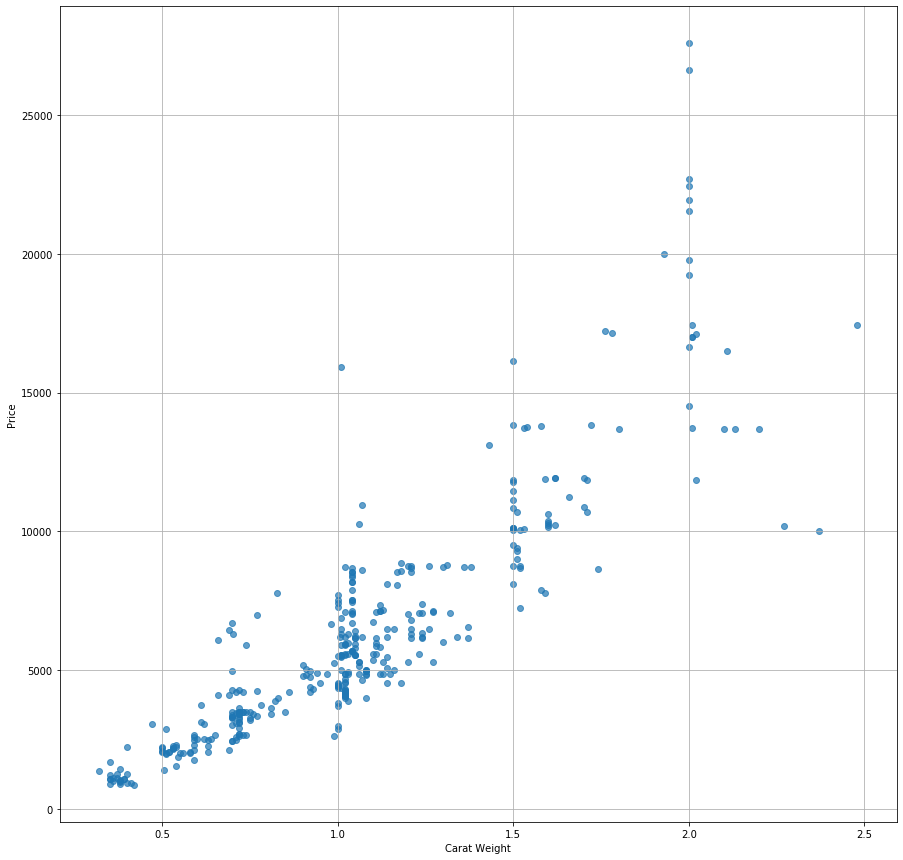

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
# carat and price
plt.scatter(x     = 'carat',
            y     = 'price',
            alpha = 0.7,
            cmap  = 'bwr',
            data  = diamond_df)


# additional formatting options
plt.xlabel('Carat Weight')
plt.ylabel('Price')
plt.grid(True)


# displaying the plot
plt.show()

Insight: There was high price variation for 1 and 2 carats.

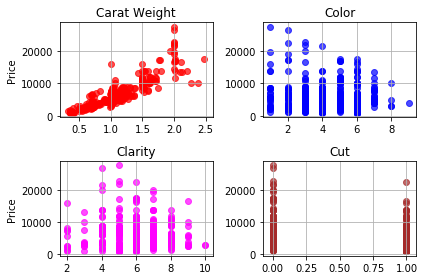

In [26]:
# Adding subplots
plt.subplot(2, 2, 1)

plt.scatter(x = 'carat',
            y = 'price',
            alpha = 0.7,
            color = 'red',
            data = diamond_df)


plt.title('Carat Weight')
plt.ylabel('Price')
plt.grid(True)

########################
plt.subplot(2, 2, 2)

plt.scatter(x = 'color',
            y = 'price',
            alpha = 0.7,
            color = 'blue',
            data = diamond_df)


plt.title('Color')
plt.grid(True)

########################
plt.subplot(2, 2, 3)

plt.scatter(x = 'clarity',
            y = 'price',
            alpha = 0.7,
            color = 'magenta',
            data = diamond_df)


plt.title('Clarity')
plt.ylabel('Price')
plt.grid(True)

########################
plt.subplot(2, 2, 4)

plt.scatter(x = 'cut',
            y = 'price',
            alpha = 0.7,
            color = 'brown',
            data = diamond_df)


plt.title('Cut')
plt.grid(True)
plt.tight_layout()
plt.show()


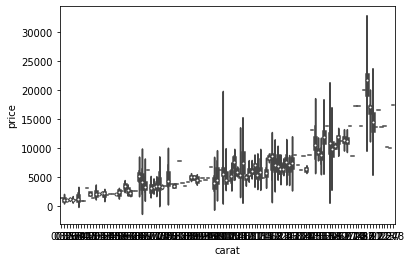

In [28]:
# violin plots
sns.violinplot(x = 'carat',
               y = 'price',
               data = diamond_df,
               orient = 'v')

plt.show()

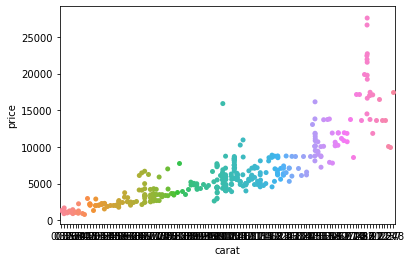

In [30]:
sns.stripplot(x = 'carat',
              y = 'price',
              data = diamond_df,
              jitter = True,
              size = 5,
              orient = 'v')


plt.show()